In [354]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.datasets import make_blobs
import seaborn as sns
from scipy.special import expit

In [355]:
np.random.seed(1234)
x = np.random.randn(1000, 2)
y = np.array(np.logical_xor(x[:, 0] > 0, x[:, 1] > 0), dtype=int)
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
Y = y
y = y.reshape(len(y), 1)

a)


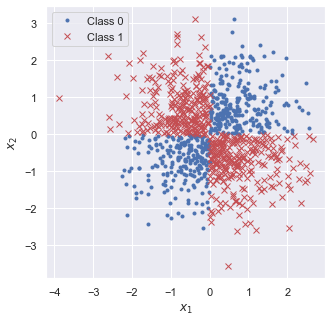

In [356]:
print('a)')
fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

## b) Analisando o gráfico do item (a), o tipo de fronteira de decisão seria não-linear

In [357]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    for index, value in enumerate(y):
        Y_one_hot[index, value] = 1
    return Y_one_hot

def sigmoid(logits):
    exps = np.exp(-logits)
    sig_output = 1/(1 + exps)
    return sig_output

def error_function(x, a, y, epsilon):
    logits = x.dot(a)
    y_prob = sigmoid(logits)
    error = -np.mean(np.sum(y * np.log(y_prob + epsilon), axis=1))
    return error

def classifier(x, a):
    logits = x.dot(a)
    y_prob = sigmoid(logits)
    c = np.zeros((len(y_prob), 1))
    for i in range(0, len(y_prob)):
        c[i, 0] = np.argwhere(y_prob[i,:] == y_prob[i,:].max())[0]
    return c

def predict_prob(x, a):
    logits = x.dot(a)
    y_prob = sigmoid(logits)
    h1 = y_prob
    h0 = 1 - h1
    h = np.c_[h0, h1]
    return h

In [358]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)

x_train = np.c_[np.ones((len(y_train), 1)), x_train]
x_test = np.c_[np.ones((len(y_test), 1)), x_test]

y_train = to_one_hot(y_train)
y_test1 = to_one_hot(y_test)

In [359]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.1
# Maximum number of iterations.
n_iterations = 1000

# Random initialization of parameters.
a = np.random.randn(x_train.shape[1],1)

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)
Jgd_v = np.zeros(n_iterations+1)

# Calculate initial error.
Jgd[0] = error_function(x_train, a, y_train, 0)
Jgd_v[0] = error_function(x_test, a, y_test1, 0)

# Batch gradient-descent loop.
minimum_val_error = float("inf")
iteration = 0
error = 1
while iteration < n_iterations:
    gradients = -1/len(y_train)*x_train.T.dot(y_train - expit(x_train.dot(a)) )
    a = a - alpha * gradients
    Jgd[iteration+1] = error_function(x_train, a, y_train, 0)
    Jgd_v[iteration+1] = error_function(x_test, a, y_test1, 0)
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    # Store weights for the smallest error ever.
    if Jgd_v[iteration+1] < minimum_val_error:
        minimum_val_error = Jgd_v[iteration+1]
        a_min = a        
    iteration = iteration + 1

c)


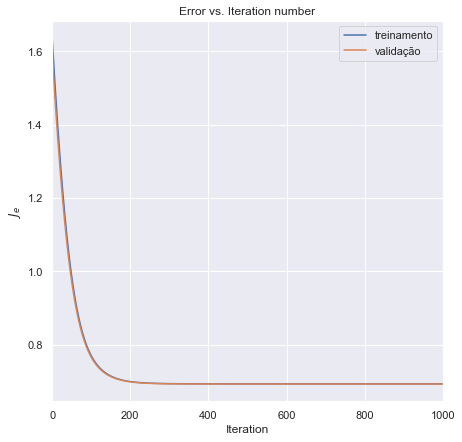

In [360]:
print('c)')
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration], label='treinamento')
plt.plot(np.arange(0, iteration), Jgd_v[0:iteration], label='validação')
plt.xlim((0, iteration))
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.legend()
plt.show()

d)


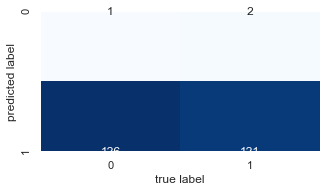

In [361]:
print('d)')
y_pred_class = classifier(x_test, a_min)

# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred_class)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

e)


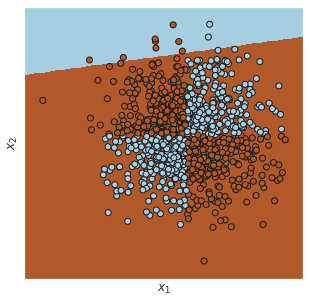

In [362]:
print('e)')
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = classifier(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()], a_min)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

f)


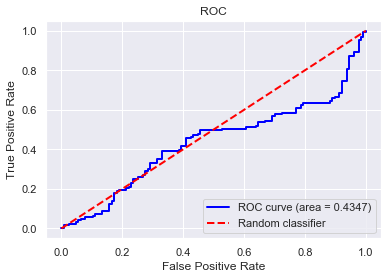

In [363]:
print('f)')
# Getting the probabilities for each class.
y_prob = predict_prob(x_test, a_min)
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [364]:
print('g)')
print(classification_report(y_test, y_pred_class))

g)
              precision    recall  f1-score   support

           0       0.33      0.01      0.02       127
           1       0.49      0.98      0.65       123

    accuracy                           0.49       250
   macro avg       0.41      0.50      0.33       250
weighted avg       0.41      0.49      0.33       250



In [365]:
np.random.seed(1234)
x = np.random.randn(1000, 2)
y = np.array(np.logical_xor(x[:, 0] > 0, x[:, 1] > 0), dtype=int)
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
Y = y
y = y.reshape(len(y), 1)

In [373]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)

x_train = np.c_[np.ones((len(y_train), 1)), x_train]
x_test = np.c_[np.ones((len(y_test), 1)), x_test]

grado = 4
for i in range(2, grado+1):
    x_train = np.c_[x_train, x_train[:,1]**i, x_train[:,2]**i]
    x_test = np.c_[x_test, x_test[:,1]**i, x_test[:,2]**i]

y_train = to_one_hot(y_train)
y_test1 = to_one_hot(y_test)

h)


## h) Melhor função hipótese encontrada: $h_{a}(x) = f(a_{0} + a_{1}x_{1} + a_{2}x_{2} + a_{3}x_{1}^{2} + a_{4}x_{2}^{2} + a_{5}x_{1}^{3} + a_{6}x_{2}^{3} + a_{7}x_{1}^{4} + a_{8}x_{2}^{4})$

In [367]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.1
# Maximum number of iterations.
n_iterations = 1000

# Random initialization of parameters.
a = np.random.randn(x_train.shape[1],1)

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)
Jgd_v = np.zeros(n_iterations+1)

# Calculate initial error.
Jgd[0] = error_function(x_train, a, y_train, 0)
Jgd_v[0] = error_function(x_test, a, y_test1, 0)

# Batch gradient-descent loop.
minimum_val_error = float("inf")
iteration = 0
error = 1
while iteration < n_iterations:
    gradients = -1/len(y_train)*x_train.T.dot(y_train - expit(x_train.dot(a)) )
    a = a - alpha * gradients
    Jgd[iteration+1] = error_function(x_train, a, y_train, 0)
    Jgd_v[iteration+1] = error_function(x_test, a, y_test1, 0)
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    # Store weights for the smallest error ever.
    if Jgd_v[iteration+1] < minimum_val_error:
        minimum_val_error = Jgd_v[iteration+1]
        a_min = a        
    iteration = iteration + 1

c)


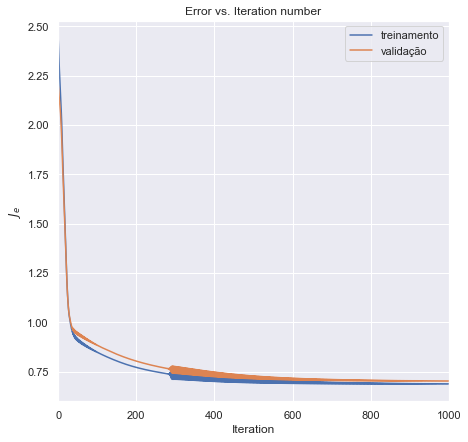

In [368]:
print('c)')
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration], label='treinamento')
plt.plot(np.arange(0, iteration), Jgd_v[0:iteration], label='validação')
plt.xlim((0, iteration))
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.legend()
plt.show()

d)


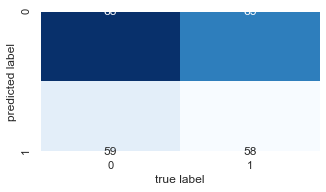

In [369]:
print('d)')
y_pred_class = classifier(x_test, a_min)

# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred_class)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

e)


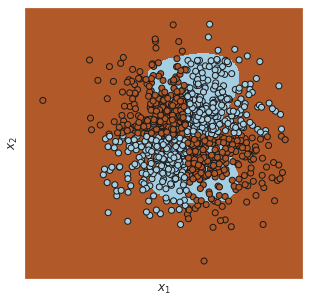

In [370]:
print('e)')
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

meshA = np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel()**1, yy.ravel()**1]
for i in range(2, grado):
    meshA = np.c_[meshA, xx.ravel()**i, yy.ravel()**i]
Z = classifier(meshA, a_min)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

f)


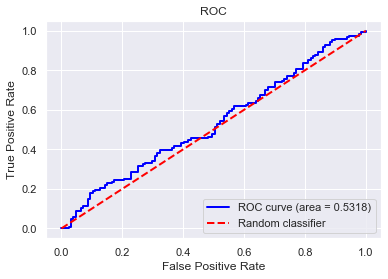

In [371]:
print('f)')
# Getting the probabilities for each class.
y_prob = predict_prob(x_test, a_min)
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [372]:
print('g)')
print(classification_report(y_test, y_pred_class))

g)
              precision    recall  f1-score   support

           0       0.51      0.54      0.52       127
           1       0.50      0.47      0.48       123

    accuracy                           0.50       250
   macro avg       0.50      0.50      0.50       250
weighted avg       0.50      0.50      0.50       250



## j) Olheando para as fronteiras de decisão no primeiro caso pode se conferir que há uma linha separando duas regiões mas a maioria dos pontos do conjunto de validação ficaram dentro de só uma dessas regiões. No outro caso, onde foi encontrada uma função hipóteses que aproximara melhor os resultados, pode se conferir que a fronteira de decisão tenta se aproximar ao conjunto de validação que se apresenta, ela tenta fazer dois quadrantes diagonales mas ainda assim pega dados da outra classe, não é perfeito. Mesmo assim, esse caso foi melhor que o primeiro, pode se conferir nas métricas enquanto à precisão. No primeiro caso a precisão foi de 0.33 e 0.49 para as classes 0 e 1 respectivamente, mas para o segundo caso a precisão foi de 0.51 e 0.50 para as classes 0 e 1 respectivamente.